# Lecture 3. 시계열 데이터의 탐색

## 3.1 자료의 이해 
- 횡단면 자료(cross-sectional data)
    - 많은 개체로부터 동일 시점에 관측된 데이터 
    - 일반적으로 각 관측치 간의 독립성을 가정함
    - Example: 2020년 졸업생의 초봉 
    
- 시계열 자료(time series data)
    - 시간의 흐름에 따라 관측된 데이터 
    - 관측치 간의 종속성이 존재함
    - Example: 1980년-2020년의 대한민국 GDP
    
    

- 패널 데이터(panel data, longitudinal data)
    - 같은 개체로부터 시간의 흐름에 따라 관측된 데이터 
    - 개체 간의 독립성은 가정되지만 한 개체로부터 측정된 데이터 간의 종속성이 존재함
    - Example: KOSPI 종목의 주가
<img src="http://kaletemple.com/wp-content/uploads/2020/05/Picture-1.png">

## 3.2 무엇을 볼 것인가?
- 트렌드, 경향성
    - 시간의 흐름에 따라 증가 혹은 감소가 있는가?
    - 계절에 따른 변화가 있는가? 
- 체크 포인트
    - 큰 그림 vs. 디테일 간의 차이가 있는가?
    - 예외적인 경우나 유난히 눈에 띄는 구간이 있는가?
    - 급격한 증가나 감소 지점이 있는가?


<img src='http://drive.google.com/uc?export=view&id=1o2ZsQg-VveYWwPWnYYGnEbFAb4eZqEvf' width=70%/><br>

<img src='http://drive.google.com/uc?export=view&id=1YYUvgDVe_8fA0Q4P9tdzW-LOaZnJ9pV-' width=70%/><br>

## 3.3 분절형 vs 연속형 그래프 

- 분절형
    - 특정 시점 또는 구간 값
    - 예: 어떤 시험의 평균 통과율 
    - 막대 그래프, 점 그래프
- 연속형
    - 지속적으로 변화
    - 예: 기온 변화 (하루 중 어느 시점, 어떤 구간의 평균값으로 측정 가능)
    - 연결된 점 그래프, 선 그래프 

<img src="https://conceptdraw.com/a2223c3/p2/preview/640/pict--column-chart-2-time-series-charts-vector-stencils-library" width=50% align="left" >
<img src="https://conceptdraw.com/a2223c3/p9/preview/640/pict--dot-plot-1-time-series-charts-vector-stencils-library" width=50% align="left">
<img src="https://conceptdraw.com/a2223c3/p7/preview/640/pict--line-chart-1-time-series-charts-vector-stencils-library" width=50%>

### 3.3.1 막대 그래프 
- x 축: 시간축, 막대의 폭과 간격은 값 표시 하지 않음
- y 축: 그래프의 크기 범위 
- 0 이상의 값을 표현할 때 y 축을 0부터 시작 
    - 비례의 왜곡 방지
    
<img src='http://drive.google.com/uc?export=view&id=1gibSMXEQdezW-cxSbEbjYEflBdeindvP' /><br>

#### Example: 네이선 핫도그 먹기대회
- 매년 미국의 독립기념일인 7월 4일 열리는 대회로 15분 동안 가장 많은 핫도그와 빵을 먹는 사람이 우승을 차지함
- 1980년부터 우승자가 먹은 핫도그의 개수를 기록
- 2001년 다케루 고바야시가 등장하면서 종전 기록의 두 배가 넘는 기록을 경신하였음

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user

In [2]:
hotdogs = pd.read_csv("http://datasets.flowingdata.com/hot-dog-contest-winners.csv")
hotdogs.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


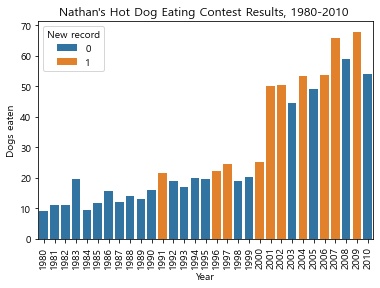

In [3]:
sns.barplot(x="Year", y="Dogs eaten", data=hotdogs, hue = 'New record', 
           dodge = False)
plt.xticks(rotation=90)
plt.title('Nathan\'s Hot Dog Eating Contest Results, 1980-2010 ')
plt.show()

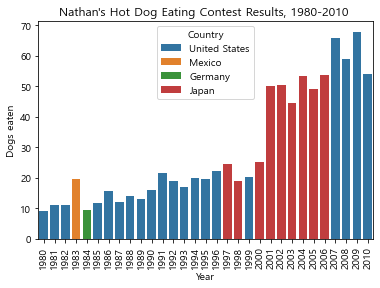

In [4]:
sns.barplot(x="Year", y="Dogs eaten", data=hotdogs, hue = 'Country', 
           dodge = False)
plt.xticks(rotation=90)
plt.title('Nathan\'s Hot Dog Eating Contest Results, 1980-2010 ')
plt.show()

#### 누적막대그래프

In [5]:
hotdog_places = pd.read_csv(
    "http://datasets.flowingdata.com/hot-dog-places.csv")

In [6]:
hotdog_places

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


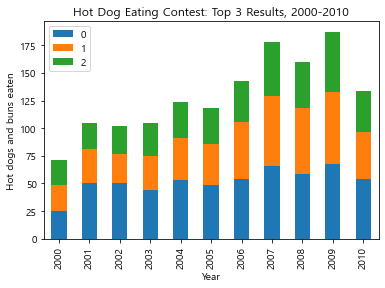

In [8]:
hotdog_places.T.plot.bar(stacked=True)
plt.xlabel('Year')
plt.ylabel('Hot dogs and buns eaten')
plt.title('Hot Dog Eating Contest: Top 3 Results, 2000-2010')
plt.show()

In [19]:
hotdog_places_1=hotdog_places.div(hotdog_places.sum(axis=0),axis=1)

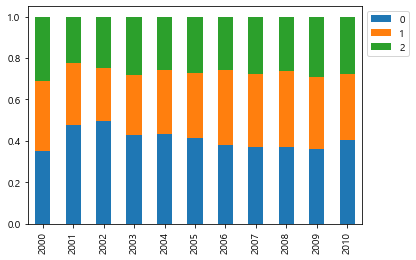

In [21]:
hotdog_places_1.T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1)) 
plt.show()

### 3.3.2 선 그래프
- 연속형 시계열 데이터 시각화에 사용
- x 축: 시간축, x축의 길이가 경향성 표현에 영향
- y 축: 0에서 시작


In [12]:
population = pd.read_csv("http://datasets.flowingdata.com/world-population.csv")

In [13]:
population.head()

,Year,Population
0,1960,3028654024
1,1961,3068356747
2,1962,3121963107
3,1963,3187471383
4,1964,3253112403


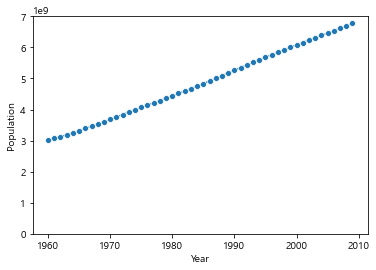

In [14]:
sns.lineplot(x="Year", y="Population", data=population, marker = 'o')
plt.ylim(0,7e9)
plt.show()

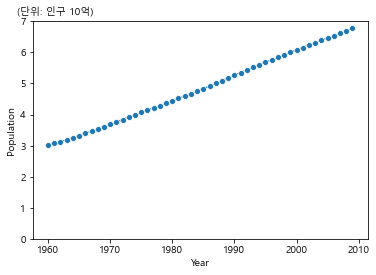

In [17]:
sns.lineplot(x=population.Year,
    y=population.Population/1e9,marker='o')
plt.ylim(0,7) # y의 범위를 정해주는 것
plt.text(1955,7.2,'(단위: 인구 10억)')
plt.show()

### 3.3.3 계단식 그래프 
- 시간에 따른 변화가 일정한 구간에서 일어나지 않는 경우 
- 예: 미국 우편요금

In [9]:
postage = pd.read_csv("http://datasets.flowingdata.com/us-postage.csv")
postage.head()

,Year,Price
0,1991,0.29
1,1995,0.32
2,1999,0.33
3,2001,0.34
4,2002,0.37


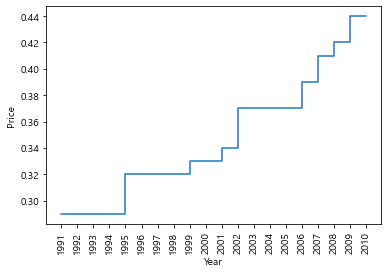

In [19]:
sns.lineplot(x="Year", y="Price", data=postage, 
             drawstyle = 'steps-post')
plt.xticks(np.arange(1991, 2011), rotation=90)
plt.show()

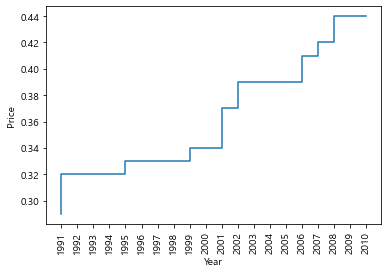

In [20]:
sns.lineplot(x="Year", y="Price", data=postage, 
             drawstyle = 'steps-pre')
plt.xticks(np.arange(1991, 2011), rotation=90)
plt.show()

## 3.4 평활기법 (smoothing method)
- 시계열의 잡음을 줄이기 위해 여러 관측치들의 평균을 사용하여 패턴을 찾으려는 기법


### 3.4.1 이동평균(moving average)
- 시간적으로 연속하는 일정한 기간(윈도우; $w$) 동안의 관측치들의 평균을 계산하여 이러한 평균의 시계열을 생성
- 계절성이 없는 시계열에 사용
$$ MA_t = (y_{t-(w-1)/2}+ \cdots + y_{t-1} + y_t + y_{t+1} + \cdots + y_{t+(w-1)/2})/w$$

In [21]:
data = pd.DataFrame({'x':[1,5,2,3,4,6,2,5,3,3]})

In [23]:
data.x.rolling(3, center=True).mean()
# rolling -> 3이기 때문에 자신과 앞뒤 하나씩 잡아서 세개의 평균을 낸 값.

0         NaN
1    2.666667
2    3.333333
3    3.000000
4    4.333333
5    4.000000
6    4.333333
7    3.333333
8    3.666667
9         NaN
Name: x, dtype: float64

In [24]:
data['ma3'] = data.x.rolling(3, center=True).mean()
data['ma6'] = data.x.rolling(6, center=True).mean()

In [25]:
data

,x,ma3,ma6
0,1,NaN,NaN
1,5,2.666667,NaN
2,2,3.333333,NaN
3,3,3.000000,3.500000
4,4,4.333333,3.666667
5,6,4.000000,3.666667
6,2,4.333333,3.833333
7,5,3.333333,3.833333
8,3,3.666667,NaN
9,3,NaN,NaN


#### Example: 삼성전자 주가 

In [26]:
import FinanceDataReader as fdr
sse = fdr.DataReader('005930', '2020') # 2020년부터의 삼성전자 주가 저장

In [28]:
sse=sse.reset_index()

In [29]:
sse.head()

,Date,Open,High,Low,Close,Volume,Change
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [30]:
sse['ma5']=sse.Close.rolling(5,center=True).mean()
sse['ma20']=sse.Close.rolling(20,center=True).mean()
sse['ma50']=sse.Close.rolling(50,center=True).mean()

In [31]:
sse.head(40)

,Date,Open,High,Low,Close,Volume,Change,ma5,ma20,ma50
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000,55760.0,NaN,NaN
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405,56440.0,NaN,NaN
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921,57240.0,NaN,NaN
5,2020-01-09,58400,58600,57400,58600,24102579,0.031690,58140.0,NaN,NaN
6,2020-01-10,58800,59700,58300,59500,16000170,0.015358,58980.0,NaN,NaN
7,2020-01-13,59600,60000,59100,60000,11359139,0.008403,59420.0,NaN,NaN
8,2020-01-14,60400,61000,59900,60000,16906295,0.000000,59840.0,NaN,NaN
9,2020-01-15,59500,59600,58900,59000,14300928,-0.016667,60200.0,NaN,NaN


In [32]:
sse.loc[sse.Date=='2020-01-08',:]

,Date,Open,High,Low,Close,Volume,Change,ma5,ma20,ma50
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921,57240.0,NaN,NaN


In [33]:
# 오차 = y-y_hat
# 2020-01-08의 5일 이동평균 오차
56800-57240

-440

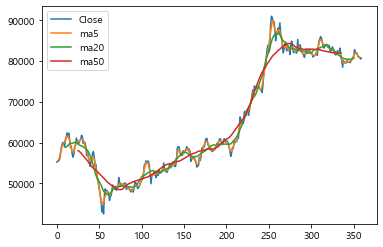

In [35]:
sse.plot(y=['Close','ma5','ma20','ma50'])
plt.show()
#주식 그래프 비슷하게 그린 것

### 10.2.2 차분하기(differencing)
- 시계열에서 추세 또는 계절적 패턴을 제거하는 단순하면서 대중적인 방법
- 시차가 1인 차분: $y_t - y_{t-1}$
    - 추세를 제거하는데 유리 
    - 2차 함수(quadratic) 및 지수형(exponential) 추세를 제거하기 위해 시차 1의 차분을 한번 더 하는 방법이 자주 사용됨

In [36]:
sse['diff1'] = sse.Close.diff()

In [37]:
sse.head()

,Date,Open,High,Low,Close,Volume,Change,ma5,ma20,ma50,diff1
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,300.0
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000,55760.0,NaN,NaN,0.0
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405,56440.0,NaN,NaN,300.0
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921,57240.0,NaN,NaN,1000.0


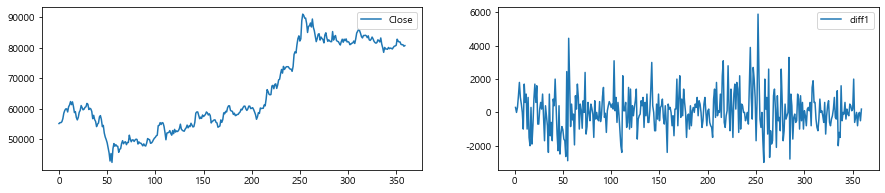

In [38]:
fig,axes=plt.subplots(1,2,figsize=(15,3))
sse.plot(y='Close',ax=axes[0])
sse.plot(y='diff1',ax=axes[1])
plt.show()

- 계절성 제거 
    - $M$의 주기를 갖는 계절적 패턴을 제거하기 위해 시차가 $M$인 차분을 실시 
    - Example: 월별 자료의 연간 패턴을 없애기 위해서 시차 12의 차분 

#### Example: Amtrak 기차의 승객 패턴

In [39]:
data_path = "./data/"
amtrak = pd.read_csv(data_path+"Amtrak.csv")

In [40]:
amtrak.head(20)

,Month,Ridership
0,Jan.91,1709
1,Feb.91,1621
2,Mar.91,1973
3,Apr.91,1812
4,May.91,1975
5,Jun.91,1862
6,Jul.91,1940
7,Aug.91,2013
8,Sep.91,1596
9,Oct.91,1725


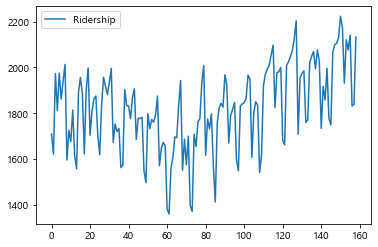

In [41]:
amtrak.plot(y='Ridership')
plt.show()

In [42]:
amtrak['diff12']=amtrak.Ridership.diff(periods=12)
#데이터가 년간 월별 데이터기 때문에 12를 기준으로 같은 월의 차이를 본다.

In [43]:
amtrak.head(20)

,Month,Ridership,diff12
0,Jan.91,1709,NaN
1,Feb.91,1621,NaN
2,Mar.91,1973,NaN
3,Apr.91,1812,NaN
4,May.91,1975,NaN
5,Jun.91,1862,NaN
6,Jul.91,1940,NaN
7,Aug.91,2013,NaN
8,Sep.91,1596,NaN
9,Oct.91,1725,NaN


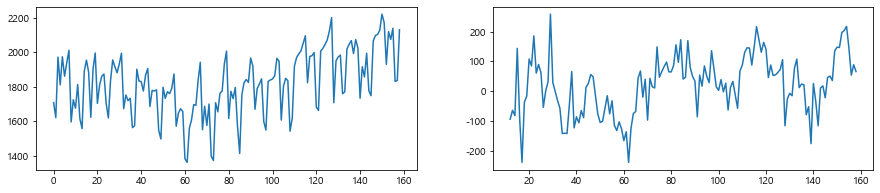

In [44]:
fig,axes=plt.subplots(1,2,figsize=(15,3))
amtrak.Ridership.plot(ax=axes[0])
amtrak.diff12.plot(ax=axes[1])
plt.show()

#### 시계열 분해 (Time Series Decomposition)
- 시계열을 추세, 계절성,오차
    - 추세($T_t$): 전체적으로 증가 혹은 감소하는 큰 흐름
    - 계절성($S_t$): 짧은 기간에 규칙적으로 반복되는 사이클
    - 오차($R_t$): random variation

$$ y_t = T_t + S_t + R_t$$

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
result = seasonal_decompose(amtrak.Ridership, model='additive', 
                            period=12)

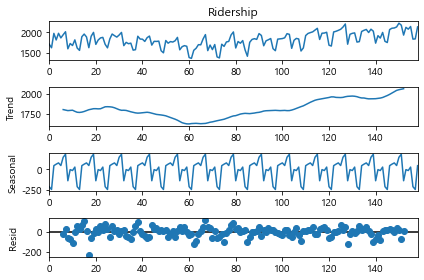

In [49]:
result.plot()
plt.show()

In [50]:
result.seasonal
#3번째 그래프(계절성)의 데이터

0     -212.284255
1     -247.159255
2       47.368523
3       65.913662
4       81.233106
          ...    
154    -12.905783
155     29.795606
156   -212.284255
157   -247.159255
158     47.368523
Name: seasonal, Length: 159, dtype: float64

<AxesSubplot:>

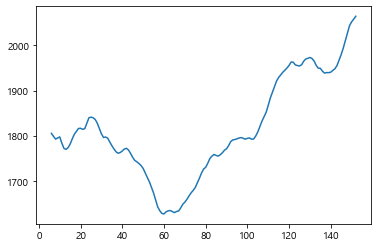

In [52]:
result.trend.plot()
#2번째 그래프(추세)를 뽑아낸 것

In [53]:
# 4번째 오차 그래프
result.resid[:20]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6     -17.238982
7      25.587941
8     -57.969752
9     -69.208801
10   -109.010884
11     -0.003940
12     54.575921
13     33.659255
14     69.298144
15    107.711338
16     10.100227
17   -229.833801
18    -58.738982
19     -7.828726
Name: resid, dtype: float64

### 10.2.3 단순지수평활기법(simple exponential smoothing)
- 지수가중이동평균(Exponentially weighted moving average; EWMA)라고도 불리움 
- 모든 과거의 값을 가중평균하여 평활
- 가중치는 과거로 갈수록 지수적으로 감소 
- $t+1$ 시점의 예측치를 생성하는 지수평활함수 $F_{t+1}$은 아래와 같음
$$ \begin{eqnarray}
F_{t+1} &=& \alpha y_t  + \alpha(1-\alpha) y_{t-1} + \alpha(1-\alpha)^2 y_{t-2} + \cdots\\
&=& \alpha y_t + (1-\alpha)F_t \\
&=& F_t + \alpha e_t
\end{eqnarray}$$
    - $e_t$: 실제관측치 $y_t$와 예측치 $F_t$ 사이의 오차($y_t = F_t + e_t$)
    - $\alpha$: 평활상수 

#### 평활상수 $\alpha$
- $\alpha \approx 1$: 가장 최근의 관측치만이 예측에 영향 
- $\alpha \approx 0$: 과거의 관측치들이 예측치에 더 많은 영향

##### Toy example

In [54]:
### pandas의 ewm 사용 
data['ewm']=data.x.ewm(alpha=0.2, adjust = False).mean() #alpha가 0에 가깝기 때문에 과거의 관측치들이 더 많은 영향

In [55]:
data.head()

,x,ma3,ma6,ewm
0,1,NaN,NaN,1.0000
1,5,2.666667,NaN,1.8000
2,2,3.333333,NaN,1.8400
3,3,3.000000,3.500000,2.0720
4,4,4.333333,3.666667,2.4576


In [56]:
# t=1
0.2*5 + 0.8*1

1.8

In [57]:
# t=2
0.2*2 + 0.8*1.8

1.8400000000000003

In [58]:
# t=3
0.2*3 + 0.8*1.84

2.072

In [59]:
### statsmodels의 SimpleExpSmoothing 사용
from statsmodels.tsa.api import SimpleExpSmoothing

fit_data = SimpleExpSmoothing(data.x).fit(
    smoothing_level=0.2, optimized=False)
fit_data.fittedvalues

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


0    1.000000
1    1.000000
2    1.800000
3    1.840000
4    2.072000
5    2.457600
6    3.166080
7    2.932864
8    3.346291
9    3.277033
dtype: float64

##### Example: 삼성전자 주가

In [69]:
### pandas의 ewm 사용 

fit_ewm1 = sse.Close[-50:].ewm(alpha=0.2).mean()
fit_ewm2 = sse.Close[-50:].ewm(alpha=0.6).mean()

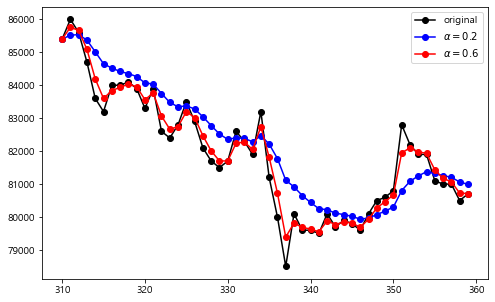

In [70]:
plt.figure(figsize=(8,5))
line1, = plt.plot(sse.Close[-50:], marker='o', color='black')
line2, = plt.plot(fit_ewm1, marker='o', color='blue')
line3, = plt.plot(fit_ewm2, marker='o', color='red')
plt.legend([line1, line2, line3],['original', r'$\alpha=0.2$', r'$\alpha=0.6$'])
plt.show()

In [71]:
### statsmodels의 SimpleExpSmoothing 사용

fit1 = SimpleExpSmoothing(sse.Close[-50:]).fit(smoothing_level=0.2)
fit2 = SimpleExpSmoothing(sse.Close[-50:]).fit(smoothing_level=0.6)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


#### 예측
- 미래에 대한 예측치는 모두 동일한(flat) 형태를 지님
$$F_{t+2} = \alpha F_{t+1} + (1-\alpha)F_{t+1} = F_{t+1} $$ 

In [72]:
fcast1 = fit1.forecast(10)
fcast2 = fit2.forecast(10)

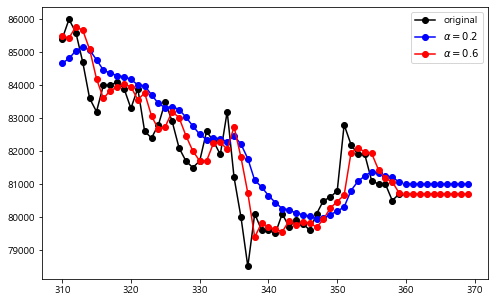

In [73]:
plt.figure(figsize=(8,5))
line1, = plt.plot(sse.Close[-50:], marker='o', color='black')
line2, = plt.plot(fit1.fittedvalues, marker='o', color='blue')
line3, = plt.plot(fit2.fittedvalues, marker='o', color='red')
plt.plot(fcast1, marker='o', color='blue')
plt.plot(fcast2, marker='o', color='red')
plt.legend([line1, line2, line3],['original', r'$\alpha=0.2$', r'$\alpha=0.6$'])
plt.show()

## 10.3 ARMA 모형
#### 시계열의 정상성 (stationary)
- 평균이 일정하다. $E(y_t)=\mu$
- 분산이 일정하다. $Var(y_t)=\sigma^2$
- 공분산이 시차에만 의존한다. $Cov(y_t, y_{t+k})=\gamma_k$

#### AutoRegressive Moving-Average(ARMA) 모형
- 변수의 과거 값의 선형 조합을 이용하여 관심있는 변수를 예측하는 AR모형과 과거 예측오차의 선형 조합을 이용하는 MA 모형을 결합한 형태의 모형
- 정상 시계열을 대상으로 한 모형
- ARMA(p,q)


$$
\begin{eqnarray}
y_t = &\beta_0& + \beta_1 y_{t-1} + \beta_2 y_{t-2} +\cdots+ \beta_p y_{t-p} \\
&+& \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
\end{eqnarray}$$

#### ARMA 모형의 식별 
- 자기상관함수(Autocorrelation function; ACF): $y_t$와 $y_{t-k}$ 간의 상관계수 
- 편자기상관함수(Partial autocorrelation function; PACF): 다른 모든 짧은 시차 항에 따라 조정한 후 $y_t$와 $y_{t-k}$ 간의 상관계수 
- ACF와 PACF의 모양을 참고하여 ARMA 모형의 차수($p, q$)를 식별 

<img src='http://drive.google.com/uc?export=view&id=1MYlt06LtP7Xv-hO-Dt8Ue6lHhL_qi3Xh' />

|       | AR(p) |         MA(q)        |      ARMA(p, q)      |  
|:-----:|:--------------------:|:--------------------:|:---------:|
|  ACF  |       Tails off      | Cuts off after lag q | Tails off |
|  PACF | Cuts off after lag p |       Tails off      | Tails off |

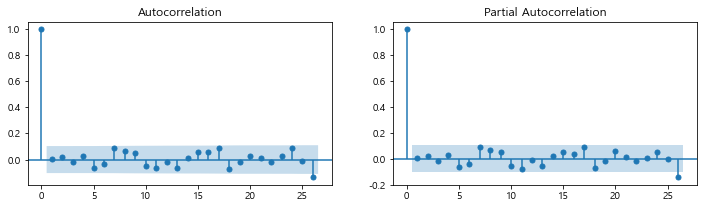

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2, figsize=(12,3))
plot_acf(sse.diff1[1:],ax=axes[0])
plot_pacf(sse.diff1[1:], ax=axes[1] )
plt.show()

In [87]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sse.Close, order=(1,1 ,0)).fit() # 숫자: 몇번 차분을 할 것이냐
model.summary().tables[0]

Dep. Variable:,Close,No. Observations:,359
Model:,"ARIMA(1, 1, 0)",Log Likelihood,-3042.081
Date:,"Tue, 15 Jun 2021",AIC,6088.162
Time:,03:06:32,BIC,6095.923
Sample:,0,HQIC,6091.248
,- 359,,
Covariance Type:,opg,,


In [88]:
fcast_arima = model.forecast(10)

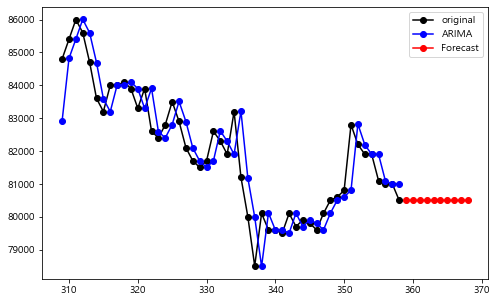

In [89]:
plt.figure(figsize=(8,5))
line1, = plt.plot(sse.Close[-50:], marker='o', color='black')
line2, = plt.plot(model.fittedvalues[-50:], marker='o', color='blue')
line3, = plt.plot(fcast_arima, marker='o', color='red')
plt.legend([line1, line2, line3],['original', 'ARIMA', 'Forecast'])
plt.show()

#### References
http://kaletemple.com/a-gentle-introduction-to-time-series-forecasting/
Shmueli, G., & Lichtendahl Jr, K. C. (2016). Practical time series forecasting with r: A hands-on guide. Axelrod Schnall Publishers.
